<a href="https://colab.research.google.com/github/IamJac/MachineLearningAlgorithms/blob/main/MultipleLinearRegression01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [32]:
iris=datasets.load_iris()
print(iris.data.shape)
df=pd.DataFrame(iris.data,columns=iris.feature_names)
print(df.head())
print(df.tail())

(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000
                   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
sepal length (cm)           1.000000         -0.117570           0.871754          0.817941
sepal width (cm)           -0.117570          1.000000          -0.428440         -0.366126
peta

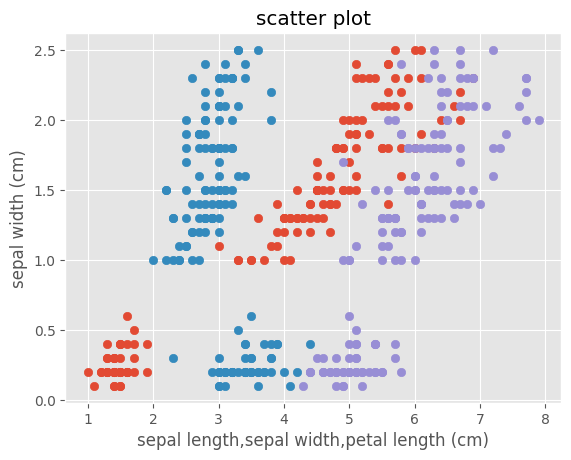

In [33]:
print(df.describe())
print(df.corr())
print(df.shape)
print(df.memory_usage(deep=True))
plt.style.use('ggplot')
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'])
plt.scatter(x=df['sepal width (cm)'],y=df['petal width (cm)'])
plt.scatter(x=df['sepal length (cm)'],y=df['petal width (cm)'])
plt.xlabel('sepal length,sepal width,petal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('scatter plot')
plt.show()

In [34]:
x_data=df[['sepal length (cm)','sepal width (cm)','petal length (cm)']].values.reshape(-1,3)
y_data=df['petal width (cm)'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)
print(x_train)
print()
print(y_train)

[[7.6 3.  6.6]
 [6.3 2.9 5.6]
 [5.7 4.4 1.5]
 [6.  2.2 5. ]
 [5.4 3.9 1.3]
 [4.7 3.2 1.6]
 [5.  3.6 1.4]
 [7.7 3.8 6.7]
 [5.7 3.8 1.7]
 [6.2 2.8 4.8]
 [4.9 3.1 1.5]
 [6.1 3.  4.6]
 [5.3 3.7 1.5]
 [6.6 3.  4.4]
 [5.7 2.5 5. ]
 [6.5 3.  5.2]
 [6.1 3.  4.9]
 [6.7 3.1 4.4]
 [5.7 2.9 4.2]
 [6.7 3.1 4.7]
 [6.3 3.3 4.7]
 [7.  3.2 4.7]
 [6.7 3.3 5.7]
 [4.4 3.2 1.3]
 [5.  3.  1.6]
 [5.1 2.5 3. ]
 [4.7 3.2 1.3]
 [5.6 3.  4.1]
 [5.5 2.4 3.7]
 [6.7 3.1 5.6]
 [4.8 3.  1.4]
 [6.3 2.8 5.1]
 [6.9 3.1 5.4]
 [5.7 2.8 4.1]
 [5.  2.3 3.3]
 [6.1 2.8 4. ]
 [7.2 3.2 6. ]
 [5.  3.2 1.2]
 [5.7 2.8 4.5]
 [6.5 3.  5.8]
 [5.1 3.7 1.5]
 [4.3 3.  1.1]
 [6.7 3.  5.2]
 [6.5 2.8 4.6]
 [5.4 3.9 1.7]
 [6.  2.9 4.5]
 [7.2 3.6 6.1]
 [7.2 3.  5.8]
 [5.5 2.3 4. ]
 [6.  3.4 4.5]
 [6.  2.2 4. ]
 [6.1 2.6 5.6]
 [6.8 3.2 5.9]
 [7.9 3.8 6.4]
 [6.4 3.2 5.3]
 [4.9 2.4 3.3]
 [5.6 2.8 4.9]
 [6.5 3.  5.5]
 [5.6 2.9 3.6]
 [5.4 3.4 1.5]
 [6.8 3.  5.5]
 [6.4 2.9 4.3]
 [7.4 2.8 6.1]
 [5.6 2.7 4.2]
 [6.3 2.5 4.9]
 [5.1 3.5 1.4]
 [6.2 3.4 

In [35]:
Regressor=linear_model.LinearRegression()
Regressor.fit(x_train,y_train)
print("Model trained successfully")
print()
print("Optimal parameters:-")
print(f"Weights = {Regressor.coef_}")
print(f"Bias = {Regressor.intercept_}")

Model trained successfully

Optimal parameters:-
Weights = [[-0.27261786  0.29562082  0.55324919]]
Bias = [-0.19757409]


In [36]:
data_pred=Regressor.predict(x_test)
print("       PREDICTIONS")
predictions=pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':data_pred.squeeze()})
print(predictions)

       PREDICTIONS
    Actual  Predicted
0      1.5   1.252182
1      0.2   0.550144
2      2.3   1.964951
3      1.2   1.177090
4      1.8   1.923784
5      0.3   0.328043
6      1.5   1.652250
7      1.3   1.348467
8      1.5   1.548708
9      1.2   1.202853
10     2.3   1.659358
11     0.3  -0.025203
12     0.2   0.165868
13     1.3   1.255077
14     0.2   0.221297
15     0.6   0.359208
16     1.7   1.695272
17     1.4   1.431959
18     0.5   0.328147
19     2.3   2.289302
20     0.2   0.295483
21     1.6   1.786466
22     0.2   0.420633
23     1.7   1.628995
24     0.2   0.189434
25     0.1   0.426732
26     2.2   1.983605
27     0.2   0.208994
28     1.5   1.493280
29     1.9   1.590231


In [40]:
print("Input values for prediction")
sepal_length=float(input("Enter sepal length:"))
sepal_width=float(input("Enter sepal width:"))
petal_length=float(input("Enter petal length:"))
prediction=Regressor.predict([[sepal_length,sepal_width,petal_length]])
print(f"Predicted petal width = {prediction[0]}")

Input values for prediction
Enter sepal length:3
Enter sepal width:5
Enter petal length:2
Predicted petal width = [1.56917483]


In [41]:
print("Mean Absolute Error =",mean_absolute_error(y_test,data_pred))
print("Mean Squared Error =",mean_squared_error(y_test,data_pred))
print("Root Mean Squared Error =",root_mean_squared_error(y_test,data_pred))

Mean Absolute Error = 0.14463384032280596
Mean Squared Error = 0.04322285383641958
Root Mean Squared Error = 0.20790106742491626
